In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage
import cv2

In [2]:
#understanding the image
coins = Image.open('coins.png')
coins.show()
c = np.asarray(coins)
c.shape

(203, 248)

In [3]:
coins_img = Image.open('coins.png')
quote_img = Image.open('quote.png')
sudoku_img = Image.open('sudoku.png')

In [4]:
coins_arr = np.asarray(coins_img)
quote_arr = np.asarray(quote_img)
sudoku_arr = np.asarray(sudoku_img)

# Question-1, Histogram

In [5]:
def histogram(gray_img):
    img_arr = np.asarray(gray_img)
    hist = np.zeros(256)
    for i in range(len(img_arr)):
        for j in range(len(img_arr[0])):
            intensity = img_arr[i,j]
            hist[intensity] += 1
    return hist    

Text(0, 0.5, 'Frequency')

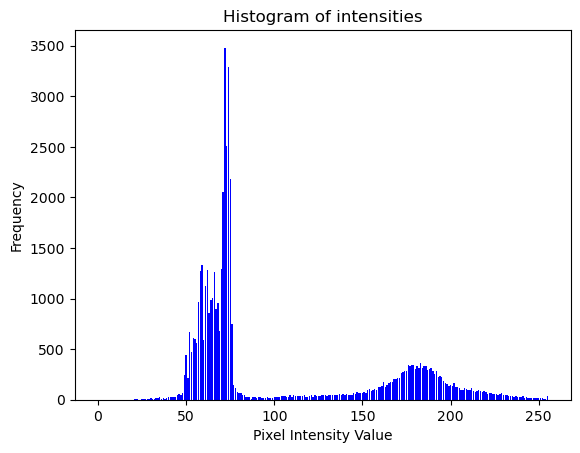

In [6]:
x = [i for i in range(256)]
plt.bar(x, histogram(coins_img), color='blue')

# Plot customization
plt.title("Histogram of intensities")
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Frequency")


In [7]:
avg_intensity = np.mean(coins_img)
avg_intensity_from_hist = (sum([i * value for i, value in enumerate(histogram(coins_img))])/sum(histogram(coins_img)))
#sum(histogram(coins_img)) = total number of pixels
print(avg_intensity)
print(avg_intensity_from_hist)

103.30500158906722
103.30500158906722


# Question-2, Otsu’s Binarization

In [8]:
#Function within class variance
def within_class_variance(grayscale_image,threshold):
    gray_img_array = np.array(grayscale_image.convert('L'))
    
    class_0 = gray_img_array[gray_img_array <= threshold]
    class_1 = gray_img_array[gray_img_array > threshold]
    #if one of the class empty, cant calculte variance and probability
    if len(class_0)==0 or len(class_1)==0:
        return 5000
        
    prob_c_0 = len(class_0)/(len(class_0) + len(class_1))
    prob_c_1 = len(class_1)/(len(class_0) + len(class_1))
    
    c_0_variance = np.var(class_0)
    c_1_variance = np.var(class_1)
    
    sigma_w_square = (prob_c_0)*(c_0_variance)+(prob_c_1)*(c_1_variance)
    return sigma_w_square


In [9]:
#Function between class variance
def between_class_variance(grayscale_image,threshold):
    gray_img_array = np.array(grayscale_image.convert('L'))
    
    class_0 = gray_img_array[gray_img_array <= threshold]
    class_1 = gray_img_array[gray_img_array > threshold]
    #if one of the class empty, cant calculte variance and probability
    if len(class_0)==0 or len(class_1)==0:
        return 0
    
    prob_c_0 = len(class_0)/(len(class_0)+len(class_1))
    prob_c_1 = len(class_1)/(len(class_0)+len(class_1))
    
    mean_c_0 = np.mean(class_0)
    mean_c_1 = np.mean(class_1)
    sigma_b_square = (prob_c_0)*(prob_c_1)*((mean_c_0 - mean_c_1)**2)
    return sigma_b_square
    

In [10]:
#finding t by Minimizing the within class variance

intensities = np.array([i for i in range(256)])
within_class_variances = np.array([within_class_variance(coins_img,t) for t in intensities])
threshold_wcv = np.argmin(within_class_variances)
print(f'The optimal threshold achieved by minimizing within class variance is : {threshold_wcv}')


The optimal threshold achieved by minimizing within class variance is : 125


In [11]:
#finding t by Maximizing the between class variance

intensities = np.array([i for i in range(256)])
between_class_variances = np.array([between_class_variance(coins_img,t) for t in intensities])
threshold_bcv = np.argmax(between_class_variances)
print(f'The optimal threshold achieved by minimizing within class variance is : {threshold_wcv}')


The optimal threshold achieved by minimizing within class variance is : 125


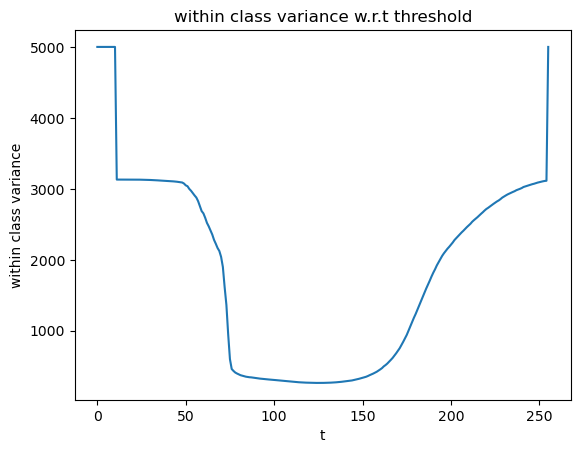

In [12]:

#within class variance w.r.t threshold
intensities = np.array([i for i in range(256)])
within_class_variances = np.array([within_class_variance(coins_img,t) for t in intensities])
plt.plot(intensities, within_class_variances)

# Add title and labels
plt.title("within class variance w.r.t threshold")
plt.xlabel("t")
plt.ylabel("within class variance")



# Display the plot
plt.show()

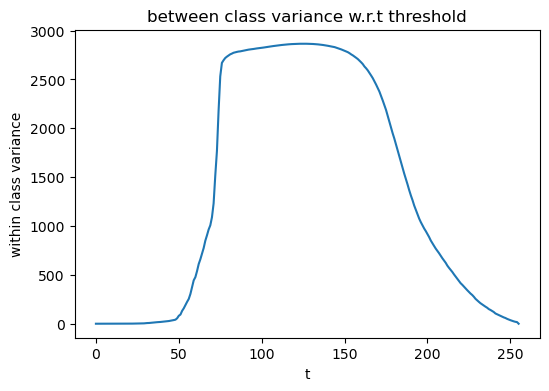

In [13]:
#between class variance w.r.t threshold
plt.figure(figsize=(6, 4))
intensities = np.array([i for i in range(256)])
between_class_variances = np.array([between_class_variance(coins_img,t) for t in intensities])
plt.plot(intensities, between_class_variances)

# Add title and labels
plt.title("between class variance w.r.t threshold")
plt.xlabel("t")
plt.ylabel("within class variance")



# Display the plot
plt.show()

Text(0, 0.5, 'sigma_w_square + sigma_b_square')

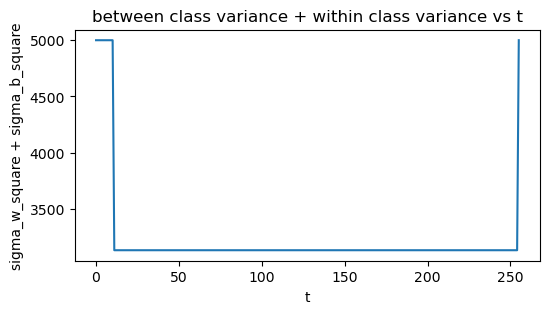

In [14]:
plt.figure(figsize=(6, 3))

plt.plot(intensities, between_class_variances + within_class_variances)
plt.title("between class variance + within class variance vs t")
plt.xlabel("t")
plt.ylabel("sigma_w_square + sigma_b_square")


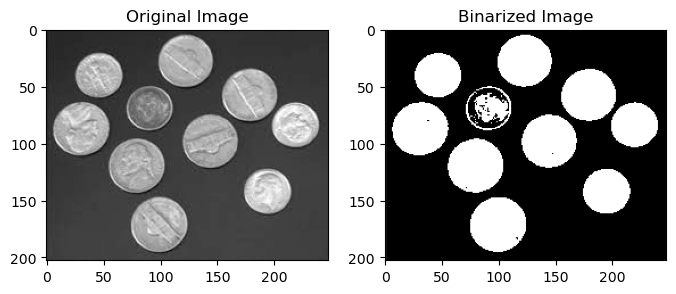

In [15]:
def binarize_img(gray_img, t):
    img_arr = np.array(gray_img)
    img_arr[img_arr<=t] = 0
    img_arr[img_arr>t] = 255
    return img_arr
    
opt_t = 125

plt.figure(figsize=(8, 4))

# Plot the original image
plt.subplot(1, 2, 1)  
plt.imshow(coins_img, cmap = 'gray')
plt.title("Original Image")


# Plot the binarized image
plt.subplot(1, 2, 2)  
plt.imshow(binarize_img(coins_img,opt_t), cmap = 'gray')
plt.title("Binarized Image")


# Show the plot
plt.show()

# Question-3, Adaptive Binarization

In [16]:
sudoku_img = Image.open('sudoku.png')
sudoku_arr = np.asarray(sudoku_img)

In [17]:
# shape=(x,y) ; x = height(vertical), y=length/width(hosrizontal)
sudoku_arr.shape

(512, 512)

In [18]:
#Function within class variance
def within_class_variance(gray_img_arr,threshold):
    
    class_0 = gray_img_arr[gray_img_arr <= threshold]
    class_1 = gray_img_arr[gray_img_arr > threshold]
    #if one of the class empty, cant calculte variance and probability
    if len(class_0)==0 or len(class_1)==0:
        return np.inf
        
    prob_c_0 = len(class_0)/(len(class_0) + len(class_1))
    prob_c_1 = len(class_1)/(len(class_0) + len(class_1))
    
    c_0_variance = np.var(class_0)
    c_1_variance = np.var(class_1)
    
    sigma_w_square = (prob_c_0)*(c_0_variance)+(prob_c_1)*(c_1_variance)
    return sigma_w_square

    
#finding t by Minimizing the within class variance
def ostu_binar(gray_img_arr):
    intensities = np.array([i for i in range(256)])
    within_class_variances = np.array([within_class_variance(gray_img_arr,t) for t in intensities])
    threshold_wcv = np.argmin(within_class_variances)
    return threshold_wcv

def binarize_img(img_arr, t):
    img_arr[img_arr<=t] = 0
    img_arr[img_arr>t] = 255
    return img_arr


In [19]:
def adaptive_binarization(gray_img, N):
    gray_img_arr = np.array(gray_img.convert('L'))
    ht, wt =  gray_img_arr.shape
    
    binarized_img_arr = np.zeros((ht, wt))
    # total N*N blocks
    #find each block size
    block_ht = ht//N
    block_wt = wt//N
    
    for i in range(0, ht, block_ht):
        for j in range(0, wt, block_wt):
            # Extract the current block
            block_img = gray_img_arr[i:i + block_ht, j:j + block_wt]
            t = ostu_binar(block_img)
            binarized_block_img = binarize_img(block_img, t)
            binarized_img_arr[i:i + block_ht, j:j + block_wt] =  binarized_block_img
    return binarized_img_arr
    

In [20]:
binarized_2_2 = adaptive_binarization(sudoku_img, 2)
binarized_4_4 = adaptive_binarization(sudoku_img, 4)
binarized_8_8 = adaptive_binarization(sudoku_img, 8)
binarized_16_16 = adaptive_binarization(sudoku_img, 16)

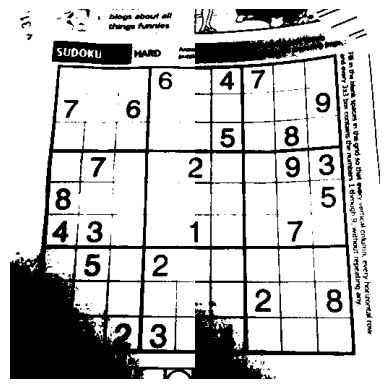

In [21]:
#2 by 2 blocks
plt.imshow(binarized_2_2, cmap='gray')
plt.axis('off')
plt.show()

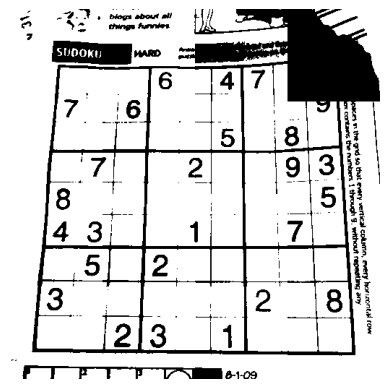

In [22]:
#4 by 4 blocks
plt.imshow(binarized_4_4, cmap='gray')
plt.axis('off')
plt.show()

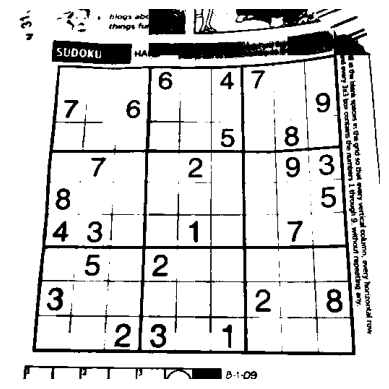

In [23]:
#8 by 8 blocks
plt.imshow(binarized_8_8, cmap='gray')
plt.axis('off')
plt.show()

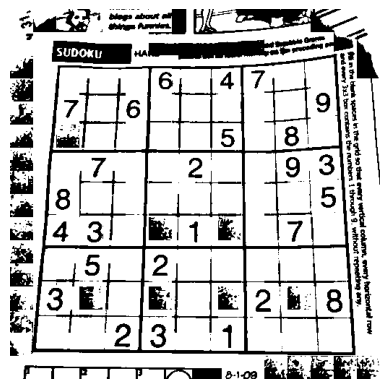

In [24]:
#16 by 16 blocks
plt.imshow(binarized_16_16, cmap='gray')
plt.axis('off')
plt.show()

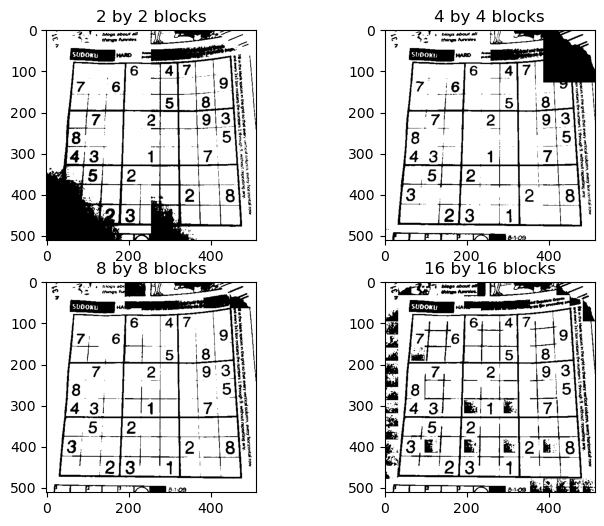

In [25]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)  
plt.imshow(binarized_2_2 , cmap = 'gray')
plt.title("2 by 2 blocks")

plt.subplot(2, 2, 2)  
plt.imshow(binarized_4_4, cmap = 'gray')
plt.title("4 by 4 blocks")

plt.subplot(2, 2, 3)  
plt.imshow(binarized_8_8, cmap = 'gray')
plt.title("8 by 8 blocks")

plt.subplot(2, 2, 4)  
plt.imshow(binarized_16_16, cmap = 'gray')
plt.title("16 by 16 blocks")


# Show the plot
plt.show()

# Question-4, Connected components

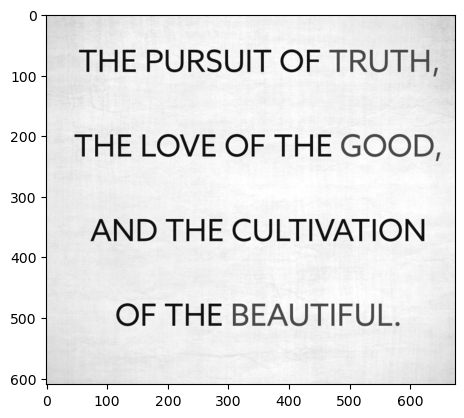

In [26]:
plt.imshow(quote_img, cmap='gray')

In [27]:
def give_label_component(image, x, y, label):
    stack = [(x, y)]
    while stack:
        a, b = stack.pop()
        if image[b, a] == 255:
            image[b, a] = label  # Label the pixel
            # Check all 8 neighbors
            for c, d in [(a-1, b), (a-1, b-1), (a, b-1), (a+1, b-1),
                           (a+1, b), (a+1, b+1), (a, b+1), (a-1, b+1)]:
                if 0 <= c < image.shape[1] and 0 <= d < image.shape[0] and image[d,c] == 255:
                    stack.append((c, d))

def count_characters(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 1: Binarize the image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Step 2: Label connected components using 8-neighbour connectivity
    labeled_image = binary_image.copy()
    label = 2  
    for i in range(labeled_image.shape[0]):
        for j in range(labeled_image.shape[1]):
            if labeled_image[i, j] == 255: 
                give_label_component(labeled_image, j, i, label)  # Label the connected component
                label += 1  # Increment the label for the next component
    
    # Step 3: Filter out small components (likely punctuations) and count characters
    #return arr to see which are the punctuations and remove it
    character_count = 0
    arr = []
    for label in range(2, label):
        component = np.where(labeled_image == label, 1, 0)
        arr.append(cv2.countNonZero(component))
        if np.count_nonzero(component) > 60:  # Threshold to filter out small components, small components were in range(30,53)
            character_count += 1
    
    return character_count


print(f"Number of characters excluding punctuations: {count_characters('quote.png')}")

Number of characters excluding punctuations: 64
